In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq, minimize_scalar
from scipy.integrate import solve_ivp

In [68]:
a = 0.5
b = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0 = 0
tf = 25

In [69]:
def dsdt(t, s):
    return - a * s


soln = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)
t, s = soln.t, soln.y[0]


def s_t(t,s0,a):
    return S0 * np.exp(-a * t)


def f_s(p,y,t):
    a, S0  = p
    return s - s_t(t, S0, a)

In [70]:
parameters_1 = a,S0
res_s = leastsq(f_s, parameters_1, args=(s, t))
#print(res_s[0])

In [71]:
def didt(t, i):
    return a * soln.sol(t) - b * i


soln_i = solve_ivp(didt, (t0, tf), [R0], dense_output=True)
t, i = soln_i.t, soln_i.y[0]

In [72]:
def i_t(t,I0,S0,a):
    return (I0 + a * S0 * t) * np.exp(-a * t)


def f_i(p,y,t):
    a, S0, I0  = p
    return i - i_t(t, I0 ,S0 ,a)

In [73]:
parameters_2 = a, S0, I0
res_i = leastsq(f_i, parameters_2, args=(i, t))
#print(res_i[0])

In [74]:
def drdt(t, _):
    return b * soln_i.sol(t)


soln_r = solve_ivp(drdt, (t0, tf), [R0], dense_output=True)
t, r = soln_r.t, soln_r.y[0]

In [75]:
def r_t(t,S0,I0,a,N):
    return N - s_t(t,S0,a) - i_t(t,I0,S0,a)

In [76]:
def f_r(p,y,t):
    a,S0,I0,R0  = p
    return r - r_t(t,S0,I0,a,N)

In [63]:
parameters_3 = a,S0,I0,R0 
res_r = leastsq(f_r, parameters_3 , args=(r, t))
#print(res_r[0])

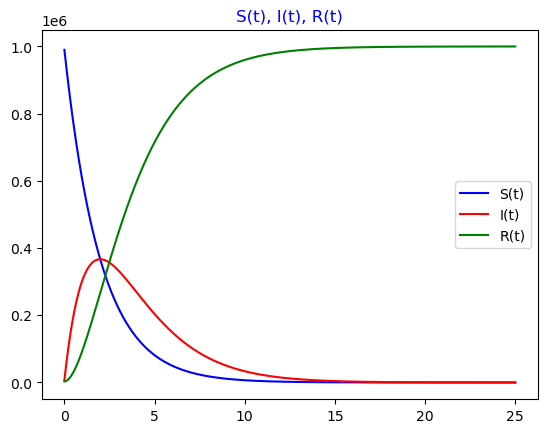

In [66]:
t = np.linspace(t0,tf,N)
y_p =  s_t(t,S0,a)
yi_p =  i_t(t,I0,S0,a)
yr_p = N - y_p -  yi_p
plt.plot(t, y_p, 'b', label = 'S(t)')
plt.plot(t, yi_p, 'r', label = 'I(t)')
plt.plot(t, yr_p, 'g', label = 'R(t)')
plt.title('S(t), I(t), R(t)',size = 12, color = 'b')
plt.legend()
plt.show()

In [41]:
result = minimize_scalar(lambda x: -i_t(x,I0,S0,a))
result.x

1.9858585752092015